# Import, Loading and cleaning data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv("/NFS_SQUAD_HISTO/OCI_DATA/02_intermediate/preprocessed_oss_counter_all_v3_new.csv",delimiter ='|')
data = data.drop('Unnamed: 0', axis =1)
data = data.sort_values(by=['week_period'])

data_3g = data[(data['week_period'] >= 202103) & (data['week_period'] <= 202106) & (data['cell_tech'] == '3G')]
duplicated = data_3g[data_3g.duplicated(subset=['cell_name','date'],keep=False)]\
            .sort_values(by=['date','cell_name'])
to_delete = duplicated[duplicated['average_number_of_users_dl'] != duplicated['average_number_of_users_dl']]
data = data.drop(to_delete.index)

# Data Analyse
## Sampling & quick overview

In [5]:
data.sample(n=5)

,index,cell_name,date,cell_band,cell_tech,cell_sector,year,week,week_period,site_id,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue
1830166,663128,OCI0811_NIL_U9-2,2020-06-15,U9,3G,2,2020,25,202025,OCI0811,28.170000,123.31,1097.48,204.00,87.13,NaN,NaN,NaN,0.000000,0.0,0.0,1.00
971323,971323,OCI2512_MESANGES_U21-32,2021-04-12,U21,3G,3,2021,15,202115,OCI2512,34.400000,118.56,3496.01,309.00,90.50,NaN,NaN,NaN,0.000000,0.0,0.0,1.00
2540959,1385777,OCI1806_PAPARA_U21-32,2020-02-10,U21,3G,3,2020,7,202007,OCI1806,4.530000,3.78,4860.23,255.00,58.77,NaN,NaN,NaN,0.000000,0.0,NaN,NaN
2084599,921870,OCI1119_VALY_U21-21,2020-08-17,U21,3G,2,2020,34,202034,OCI1119,44.800000,267.92,4159.98,339.00,92.14,NaN,NaN,NaN,0.000000,0.0,0.0,1.00
62536,62536,OCI0144_BADA_L8-2,2021-04-26,L8,4G,2,2021,17,202117,OCI0144,891.806534,0.00,3735.12,1878.47,85.73,63.26,NaN,37.41,176.137672,0.0,NaN,11.42


In [6]:
data.drop(['index','cell_sector','year','week','week_period'],axis=1).describe()

,total_data_traffic_dl_gb,total_voice_traffic_kerlands,average_throughput_user_dl_kbps,average_throughput_user_ul_kbps,cell_occupation_dl_percentage,average_number_of_users_dl,average_number_of_users_ul,cell_occupation_ul_percentage,total_data_traffic_ul_gb,lost_traffic_kerlands,traffic_loss_rate,average_number_of_users_in_queue
count,3.326042e+06,3.326042e+06,3.255942e+06,3.255400e+06,3.276595e+06,666086.000000,123364.000000,542082.000000,3.326042e+06,3.326042e+06,2.682347e+06,2.241467e+06
mean,8.793886e+01,4.659305e+02,3.582740e+03,4.976678e+02,5.698991e+01,19.320196,3.287295,18.768290,7.885114e+00,1.028937e+01,-2.235336e-02,1.506945e+00
std,2.001883e+02,6.686829e+02,5.556148e+03,9.684690e+02,3.344937e+01,24.369381,3.685405,9.323855,2.683323e+01,1.181747e+03,2.575381e+01,2.108848e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,10.000000,0.000000e+00,-1.442536e+06,-3.665911e+04,0.000000e+00
25%,1.478000e+00,2.815000e+01,4.473000e+01,2.297000e+01,2.206500e+01,2.890000,1.000000,12.030000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.187000e+01,2.370400e+02,2.275185e+03,2.360000e+02,6.743000e+01,10.000000,2.000000,15.460000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.995000e+01,6.206500e+02,3.937980e+03,3.410000e+02,9.012000e+01,26.950000,5.000000,22.350000,0.000000e+00,0.000000e+00,0.000000e+00,1.030000e+00
max,4.478728e+03,1.424068e+04,2.415333e+06,4.827934e+04,9.670000e+01,404.370000,65.000000,90.240000,4.870654e+02,5.675794e+03,5.085477e+00,8.604000e+01


## Missing values ratio per column

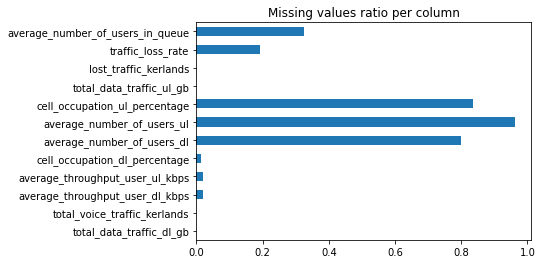

In [7]:
data.isna().sum().mul(1/len(data))[10:].plot(kind='barh')
plt.title('Missing values ratio per column')
plt.show()

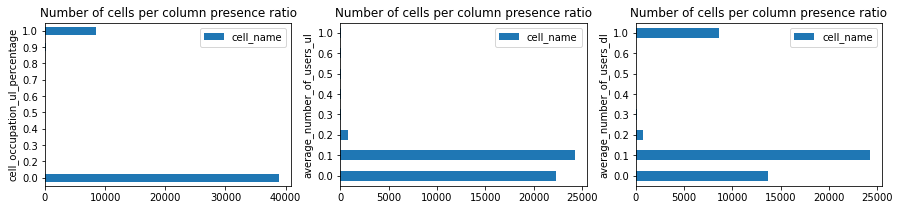

In [24]:
columns = ['cell_occupation_ul_percentage','average_number_of_users_ul','average_number_of_users_dl']
counts=[]
for column in columns : 
    df = pd.DataFrame(data.groupby('cell_name')[column].apply(lambda x: round(x.notnull().sum()/len(x),1)))
    s = df.reset_index().groupby(column).count()
    counts+=[s]
fig, axs = plt.subplots(1,3,figsize=(15,3))
for i,ax in enumerate(axs):
    counts[i].plot(kind="barh",ax=ax)
    ax.set_title('Number of cells per column presence ratio')
plt.show()
    

## Outliered cells : total_data_traffic_dl_gb

In [61]:
stds = 8
serie = data.groupby(['cell_name']).total_data_traffic_dl_gb.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]

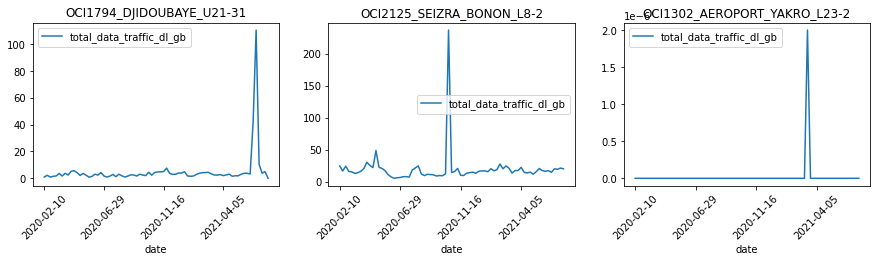

In [62]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1794_DJIDOUBAYE_U21-31', 'OCI2125_SEIZRA_BONON_L8-2', 'OCI1302_AEROPORT_YAKRO_L23-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','total_data_traffic_dl_gb']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


## Outliered cells : total_voice_traffic_kerlands

In [63]:
stds = 8
serie = data.groupby(['cell_name']).total_voice_traffic_kerlands.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print (cell)

OCI0240_BONOUA_G18-2
OCI0628_KOUMASSI_G9-2
OCI0806_NIAMBEZARIA_U21-11
OCI0806_NIAMBEZARIA_U21-12
OCI0845_ORBAFF_U21-22
OCI0845_ORBAFF_U21-23
OCI1794_DJIDOUBAYE_U21-31
OCI1794_DJIDOUBAYE_U21-32
OCI1794_DJIDOUBAYE_U21-33
OCI2123_SANDEGUE_IHS_U9-2
OCI2206_BOUKEBO_U21-33


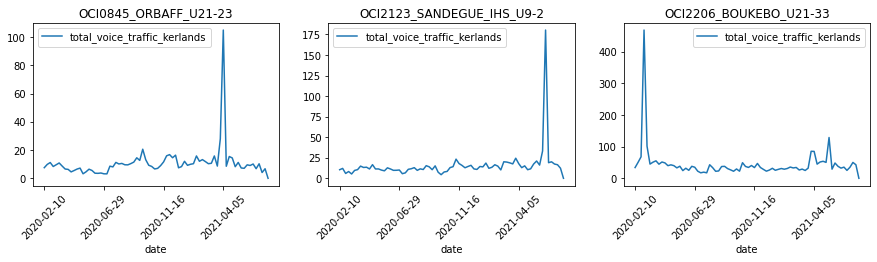

In [25]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI0845_ORBAFF_U21-23', 'OCI2123_SANDEGUE_IHS_U9-2', 'OCI2206_BOUKEBO_U21-33']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','total_voice_traffic_kerlands']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : average_throughput_user_ul_kbps

In [69]:
stds = 7
serie = data.groupby(['cell_name']).average_throughput_user_ul_kbps.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0042_AGNEBY_G9-3
OCI0074_ALLAKRO_BOUAKE_G18-3
OCI0119_ASSIE_KOUMASSI_G9-3
OCI0466_GBON_G9-3
OCI0586_KETESSO_L8-1
OCI0790_NDJEM_L8-1
OCI0880_PETIT_BONDOUKOU_G18-3
OCI1042_SUCAF_BOROTOU_G9-2
OCI1057_TAKORAGUI_G18-2
OCI1059_TANGUELAN_G18-3
OCI1065_TEAPLEU_L8-1
OCI1070_TERRAFRIC_G9-3
OCI1151_YOPOHUE_G9-3
OCI1193_PORT_BOUET_CIT_G9-1
OCI1489_LAHOU_CORRIDOR_G9-3
OCI1888_VERSANT_G9-3
OCI1905_GANZRA_G9-3
OCI2206_BOUKEBO_G18-1
OCI2514_SOWETO_L8-1
OCI2782_SINEMATIALI_CENTRE_G9-2
OCI2826_ESPACE_COCA_L8-3
OCI3009_SAGBE_RAIL_G9-2
OCI3040_AGOUETO_G9-3


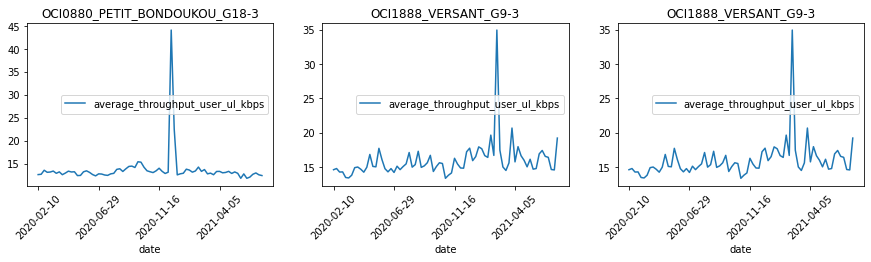

In [70]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI0880_PETIT_BONDOUKOU_G18-3', 'OCI1888_VERSANT_G9-3', 'OCI3040_AGOUETO_G9-3']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','average_throughput_user_ul_kbps']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)


## Outliered cells : average_throughput_user_dl_kbps

In [ ]:
stds = 8
serie = data.groupby(['cell_name']).average_throughput_user_dl_kbps.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]

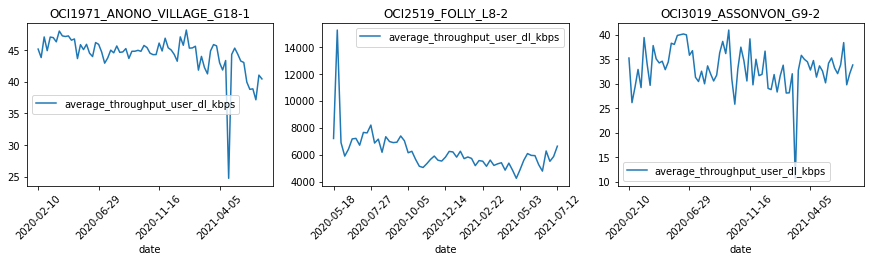

In [58]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1971_ANONO_VILLAGE_G18-1', 'OCI2519_FOLLY_L8-2', 'OCI3019_ASSONVON_G9-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','average_throughput_user_dl_kbps']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : cell_occupation_dl_percentage

In [4]:
stds = 8
serie = data.groupby(['cell_name']).cell_occupation_dl_percentage.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI1302_AEROPORT_YAKRO_L23-1
OCI2125_SEIZRA_BONON_L8-2
OCI2458_KONGOTI_VILLAGE_L23-2


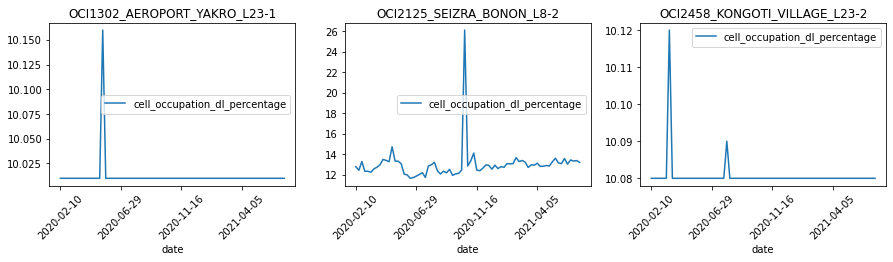

In [5]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1302_AEROPORT_YAKRO_L23-1', 'OCI2125_SEIZRA_BONON_L8-2', 'OCI2458_KONGOTI_VILLAGE_L23-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','cell_occupation_dl_percentage']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : average_number_of_users_dl

In [7]:
stds = 8
serie = data.groupby(['cell_name']).average_number_of_users_dl.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI1302_AEROPORT_YAKRO_L23-1
OCI2125_SEIZRA_BONON_L8-2
OCI2458_KONGOTI_VILLAGE_L23-2
OCI2576_KOUMASSI_POULET_L8-3


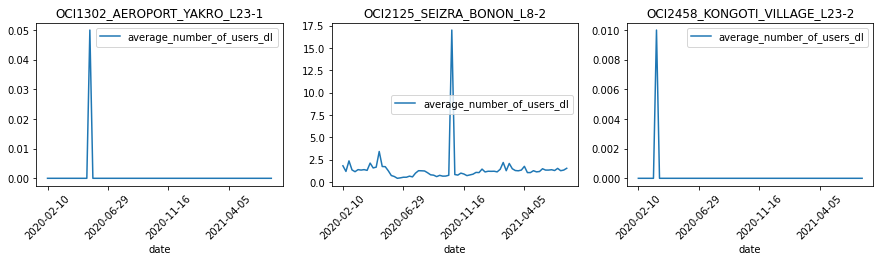

In [8]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1302_AEROPORT_YAKRO_L23-1', 'OCI2125_SEIZRA_BONON_L8-2', 'OCI2458_KONGOTI_VILLAGE_L23-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','average_number_of_users_dl']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : average_number_of_users_ul

In [12]:
stds = 5
serie = data.groupby(['cell_name']).average_number_of_users_ul.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

## Outliered cells : cell_occupation_ul_percentage

In [13]:
stds = 8
serie = data.groupby(['cell_name']).cell_occupation_ul_percentage.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0243_BONZOU_L8-2
OCI0894_PRESIDENCE_L26-2
OCI0920_RWOD_L23-1
OCI1032_STBO_L23-1
OCI1302_AEROPORT_YAKRO_L23-1
OCI2125_SEIZRA_BONON_L8-2
OCI2327_BONIKRO_NQ_L23-2


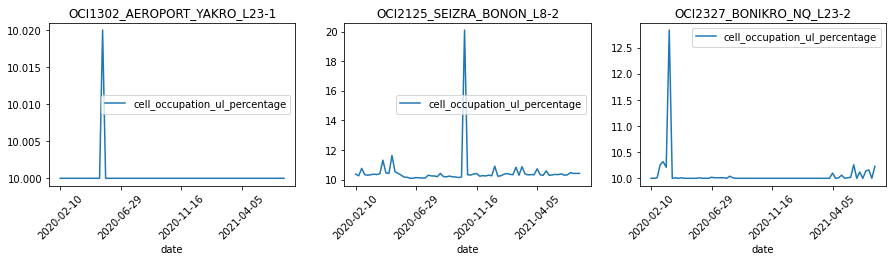

In [16]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1302_AEROPORT_YAKRO_L23-1', 'OCI2125_SEIZRA_BONON_L8-2', 'OCI2327_BONIKRO_NQ_L23-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','cell_occupation_ul_percentage']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : total_data_traffic_ul_gb

In [17]:
stds = 8
serie = data.groupby(['cell_name']).total_data_traffic_ul_gb.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0243_BONZOU_L8-2
OCI0406_ELEVI_L8-3
OCI1032_STBO_L23-1
OCI1302_AEROPORT_YAKRO_L23-1
OCI1302_AEROPORT_YAKRO_L23-2
OCI2025_AUTOROUTE_BASSAM_L23-1
OCI2125_SEIZRA_BONON_L8-2
OCI2294_OUNANGAKAHA_L8-1
OCI2327_BONIKRO_NQ_L23-2


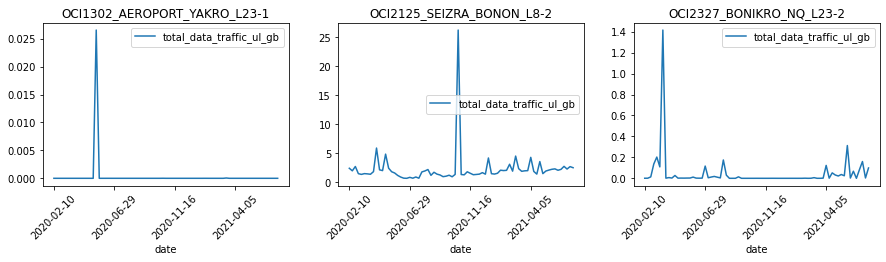

In [18]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI1302_AEROPORT_YAKRO_L23-1', 'OCI2125_SEIZRA_BONON_L8-2', 'OCI2327_BONIKRO_NQ_L23-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','total_data_traffic_ul_gb']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : lost_traffic_kerlands

In [4]:
stds = 8
serie = data.groupby(['cell_name']).lost_traffic_kerlands.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0001_ABADJIN_G18-3
OCI0002_ABATTA_G18-1
OCI0002_ABATTA_G9-1
OCI0004_ABEBROUKOI_G18-1
OCI0004_ABEBROUKOI_G18-2
OCI0006_ABENGOUROU_CIT_G18-3
OCI0008_ABIE_CIT_G9-1
OCI0008_ABIE_CIT_G9-2
OCI0009_ABOBO_G9-3
OCI0010_ABOBO_ND_G18-1
OCI0010_ABOBO_ND_G18-2
OCI0010_ABOBO_ND_G9-2
OCI0011_ABOBO_PLAQUE_G18-2
OCI0012_ABOBO_UTB_G18-1
OCI0012_ABOBO_UTB_G18-2
OCI0012_ABOBO_UTB_G18-3
OCI0012_ABOBO_UTB_G9-1
OCI0012_ABOBO_UTB_G9-2
OCI0014_ABOBOTE_G18-1
OCI0014_ABOBOTE_G18-3
OCI0014_ABOBOTE_G9-1
OCI0014_ABOBOTE_G9-2
OCI0015_ABOISSO_G9-1
OCI0015_ABOISSO_G9-2
OCI0016_ABONGOUA_G18-1
OCI0017_ABONGOUA_ATTOBROU_G18-3
OCI0019_ABY_NEW_G9-2
OCI0019_ABY_NEW_G9-3
OCI0019_ABY_U21-11
OCI0019_ABY_U21-12
OCI0019_ABY_U21-13
OCI0019_ABY_U21-21
OCI0019_ABY_U21-22
OCI0019_ABY_U21-23
OCI0019_ABY_U21-31
OCI0019_ABY_U21-32
OCI0019_ABY_U21-33
OCI0019_ABY_U9-1
OCI0019_ABY_U9-2
OCI0019_ABY_U9-3
OCI0020_ACADEMIE_G18-1
OCI0020_ACADEMIE_G18-2
OCI0020_ACADEMIE_G9-2
OCI0021_ADAHIDOUGOU_G18-1
OCI0021_ADAHIDOUGOU_G18-2
OCI0022_ADAOU_U

OCI0226_BOKOSSA_G18-2
OCI0229_BONDO_U9-1
OCI0229_BONDO_U9-2
OCI0229_BONDO_U9-3
OCI0230_BONDOUKOU_U21-11
OCI0230_BONDOUKOU_U21-12
OCI0230_BONDOUKOU_U21-13
OCI0230_BONDOUKOU_U21-21
OCI0230_BONDOUKOU_U21-22
OCI0230_BONDOUKOU_U21-23
OCI0230_BONDOUKOU_U21-31
OCI0230_BONDOUKOU_U21-32
OCI0230_BONDOUKOU_U21-33
OCI0230_BONDOUKOU_U9-1
OCI0230_BONDOUKOU_U9-2
OCI0230_BONDOUKOU_U9-3
OCI0231_BONGO_G9-1
OCI0233_BONGOUANOU_CTRL_G9-3
OCI0234_BONGUERA_G18-1
OCI0235_BONHEUR_G18-2
OCI0235_BONHEUR_G9-3
OCI0237_BONIKRO_G9-1
OCI0237_BONIKRO_G9-2
OCI0237_BONIKRO_G9-3
OCI0238_BONIKRO_OUME_G18-1
OCI0239_BONON_G9-2
OCI0241_BONOUFLA_G18-1
OCI0241_BONOUFLA_G18-3
OCI0242_BONOUMIN_G18-1
OCI0242_BONOUMIN_G18-2
OCI0242_BONOUMIN_G18-3
OCI0242_BONOUMIN_G9-3
OCI0243_BONZOU_G18-2
OCI0244_BOOKO_G9-1
OCI0245_BORIJA_G18-1
OCI0245_BORIJA_G18-2
OCI0245_BORIJA_G18-3
OCI0245_BORIJA_G9-1
OCI0245_BORIJA_G9-3
OCI0249_BOUAFLA_G9-1
OCI0249_BOUAFLA_G9-2
OCI0249_BOUAFLA_G9-3
OCI0252_BOUANDOUGOU_G18-1
OCI0252_BOUANDOUGOU_G18-3
OCI0252_B

OCI0461_GBAPET_G9-1
OCI0461_GBAPET_U21-11
OCI0461_GBAPET_U21-12
OCI0461_GBAPET_U21-13
OCI0461_GBAPET_U21-21
OCI0461_GBAPET_U21-22
OCI0461_GBAPET_U21-23
OCI0461_GBAPET_U21-31
OCI0461_GBAPET_U21-32
OCI0461_GBAPET_U21-33
OCI0463_GBAPLEU_VILLAGE_G18-1
OCI0466_GBON_G9-3
OCI0467_GD_BEREBY_G18-2
OCI0468_GD_BOUBOURY_G9-1
OCI0470_GENIE_2M_G18-1
OCI0470_GENIE_2M_G18-3
OCI0470_GENIE_2M_G9-3
OCI0472_GLANLEU_G18-3
OCI0473_GLAZAI_G18-3
OCI0474_GLIGBEUADJI_G18-3
OCI0475_GNABOYA_G18-1
OCI0477_GNAGO_G18-1
OCI0477_GNAGO_G18-2
OCI0477_GNAGO_G18-3
OCI0477_GNAGO_G9-3
OCI0478_GNATROA_G9-3
OCI0479_GNIPY_G18-3
OCI0482_GNOGBOYO_G18-3
OCI0484_GNOUSSO_G18-2
OCI0484_GNOUSSO_G18-3
OCI0484_GNOUSSO_G9-2
OCI0484_GNOUSSO_G9-3
OCI0486_GOH_G18-3
OCI0487_GOHITAFLA_G18-3
OCI0487_GOHITAFLA_G9-1
OCI0487_GOHITAFLA_G9-2
OCI0488_GOHOUNFLA_G18-2
OCI0488_GOHOUNFLA_G9-2
OCI0489_GOLF_G18-1
OCI0489_GOLF_G18-3
OCI0489_GOLF_G9-1
OCI0489_GOLF_G9-3
OCI0490_GOLF_HOTEL_G18-2
OCI0490_GOLF_HOTEL_G18-3
OCI0492_GONATE_G18-1
OCI0492_GONATE_G1

OCI0720_MEECI_G9-2
OCI0724_MENUISERIE_G18-1
OCI0724_MENUISERIE_G18-3
OCI0724_MENUISERIE_G9-1
OCI0724_MENUISERIE_G9-2
OCI0724_MENUISERIE_G9-3
OCI0725_MERCEDES_G18-1
OCI0726_MERMOZ_G9-1
OCI0727_MESANO_G18-3
OCI0727_MESANO_G9-1
OCI0727_MESANO_G9-2
OCI0727_MESANO_G9-3
OCI0729_METHODISTE_G18-1
OCI0729_METHODISTE_G18-2
OCI0729_METHODISTE_G9-3
OCI0732_MICRO_TOUR1_IVOIRE_U21-32
OCI0734_MICRO_GOURO_G18-1
OCI0742_MICRO_ID_SEA_INVEST_G18-1
OCI0746_MICRO_OD_PYRAMIDE_G18-1
OCI0746_MICRO_OD_PYRAMIDE_G18-2
OCI0746_MICRO_OD_PYRAMIDE_G18-3
OCI0750_MILLE_MAQUIS_G18-2
OCI0750_MILLE_MAQUIS_G18-3
OCI0751_MILLIONNAIRE_G18-1
OCI0751_MILLIONNAIRE_G18-2
OCI0751_MILLIONNAIRE_G18-3
OCI0751_MILLIONNAIRE_G9-1
OCI0752_MINIGNAN_G18-2
OCI0752_MINIGNAN_G18-3
OCI0753_MIRA_G18-3
OCI0754_MIRADOR_G18-1
OCI0754_MIRADOR_G18-3
OCI0754_MIRADOR_G9-1
OCI0754_MIRADOR_G9-3
OCI0755_MISA_G18-2
OCI0755_MISA_G18-3
OCI0755_MISA_G9-2
OCI0756_MISTRAL_G18-3
OCI0760_MONDOUKOU_G9-1
OCI0761_MONOKOZOHI_G18-1
OCI0762_MONT_G9-3
OCI0764_MONT_TO

OCI0993_SIRIHO_G9-2
OCI0994_SITARAIL_G18-1
OCI0994_SITARAIL_G18-2
OCI0995_SOCOCE_G9-2
OCI0996_SODEFOR_G18-2
OCI0996_SODEFOR_G9-1
OCI0996_SODEFOR_G9-2
OCI0996_SODEFOR_G9-3
OCI0997_SODIMA_G18-1
OCI1000_SOGEFIHA_G9-1
OCI1000_SOGEFIHA_G9-3
OCI1001_SOKO_G9-1
OCI1001_SOKO_U9-1
OCI1001_SOKO_U9-2
OCI1001_SOKO_U9-3
OCI1002_SOKORA_G18-1
OCI1002_SOKORA_G18-2
OCI1002_SOKORA_G18-3
OCI1002_SOKORA_G9-1
OCI1002_SOKORA_G9-3
OCI1004_SOL_BENI_G9-2
OCI1005_SOLEIL_G18-2
OCI1005_SOLEIL_G9-1
OCI1006_SOLIBRA_G9-1
OCI1006_SOLIBRA_G9-2
OCI1008_SONACO_G18-1
OCI1008_SONACO_G18-3
OCI1010_SONGON_G18-2
OCI1010_SONGON_U21-11
OCI1010_SONGON_U21-12
OCI1010_SONGON_U21-13
OCI1010_SONGON_U21-21
OCI1010_SONGON_U21-22
OCI1010_SONGON_U21-23
OCI1010_SONGON_U21-31
OCI1010_SONGON_U21-32
OCI1010_SONGON_U21-33
OCI1010_SONGON_U9-1
OCI1010_SONGON_U9-2
OCI1010_SONGON_U9-3
OCI1013_SORBONNE_G18-1
OCI1013_SORBONNE_G18-3
OCI1013_SORBONNE_G9-1
OCI1014_SOROBANGO_U9-1
OCI1014_SOROBANGO_U9-2
OCI1014_SOROBANGO_U9-3
OCI1015_SOUBOUO_G18-1
OCI1

OCI1189_ZOUKOUGBEU_2_G18-2
OCI1189_ZOUKOUGBEU_G18-2
OCI1189_ZOUKOUGBEU_G9-2
OCI1190_ZOUZOU_G18-3
OCI1192_ZUENOULA_G18-1
OCI1192_ZUENOULA_G18-3
OCI1192_ZUENOULA_G9-1
OCI1192_ZUENOULA_U21-11
OCI1192_ZUENOULA_U21-12
OCI1192_ZUENOULA_U21-13
OCI1192_ZUENOULA_U21-21
OCI1192_ZUENOULA_U21-22
OCI1192_ZUENOULA_U21-23
OCI1192_ZUENOULA_U21-31
OCI1192_ZUENOULA_U21-32
OCI1192_ZUENOULA_U21-33
OCI1192_ZUENOULA_U9-1
OCI1192_ZUENOULA_U9-2
OCI1192_ZUENOULA_U9-3
OCI1193_PORT_BOUET_CIT_G18-2
OCI1193_PORT_BOUET_CIT_G9-1
OCI1194_STE_RUTH_G18-3
OCI1196_ABOISSO_COMOE_G9-1
OCI1196_ABOISSO_COMOE_G9-2
OCI1203_DIAMBA_G9-3
OCI1204_DOKPODON_G9-1
OCI1206_GBALAGOUA_G9-1
OCI1207_GOBAZRA_G9-2
OCI1208_GUIMEYO_G18-1
OCI1208_GUIMEYO_G18-3
OCI1209_IGUELA_U9-1
OCI1209_IGUELA_U9-2
OCI1209_IGUELA_U9-3
OCI1210_KOROBO_G18-1
OCI1210_KOROBO_U9-1
OCI1210_KOROBO_U9-2
OCI1210_KOROBO_U9-3
OCI1211_KOUADIOBILEKRO_G18-2
OCI1212_MINFLA_U9-1
OCI1212_MINFLA_U9-2
OCI1212_MINFLA_U9-3
OCI1216_TIEDIO_G18-2
OCI1221_BOAHIA_U9-1
OCI1221_BOAHIA_U9-

OCI1511_ASSEMBLE_G18-1
OCI1511_ASSEMBLE_G9-1
OCI1511_ASSEMBLE_G9-3
OCI1512_BENIHOUA_G18-2
OCI1512_BENIHOUA_G18-3
OCI1512_BENIHOUA_G9-1
OCI1512_BENIHOUA_G9-3
OCI1515_CAMPUS_CITE_G18-1
OCI1515_CAMPUS_CITE_G9-1
OCI1516_ETUEBOUE_G9-1
OCI1516_ETUEBOUE_G9-3
OCI1516_ETUEBOUE_U21-11
OCI1516_ETUEBOUE_U21-12
OCI1516_ETUEBOUE_U21-13
OCI1516_ETUEBOUE_U21-21
OCI1516_ETUEBOUE_U21-22
OCI1516_ETUEBOUE_U21-23
OCI1516_ETUEBOUE_U21-31
OCI1516_ETUEBOUE_U21-32
OCI1516_ETUEBOUE_U21-33
OCI1516_ETUEBOUE_U9-1
OCI1516_ETUEBOUE_U9-2
OCI1516_ETUEBOUE_U9-3
OCI1519_LAKOTA_LYCEE_G18-1
OCI1519_LAKOTA_LYCEE_G18-3
OCI1519_LAKOTA_LYCEE_G9-3
OCI1521_PALMCI_BLIDOUBA_U21-11
OCI1521_PALMCI_BLIDOUBA_U21-12
OCI1521_PALMCI_BLIDOUBA_U21-13
OCI1521_PALMCI_BLIDOUBA_U21-21
OCI1521_PALMCI_BLIDOUBA_U21-22
OCI1521_PALMCI_BLIDOUBA_U21-23
OCI1521_PALMCI_BLIDOUBA_U21-31
OCI1521_PALMCI_BLIDOUBA_U21-32
OCI1521_PALMCI_BLIDOUBA_U21-33
OCI1521_PALMCI_BLIDOUBA_U9-1
OCI1521_PALMCI_BLIDOUBA_U9-2
OCI1521_PALMCI_BLIDOUBA_U9-3
OCI1523_ST_CHARLE_G9

OCI1764_DEBO_G18-1
OCI1764_DEBO_G18-2
OCI1764_DEBO_G18-3
OCI1765_DIBOBLI_G18-2
OCI1766_DJEZOUKRO_G18-1
OCI1766_DJEZOUKRO_G9-1
OCI1767_DOHIRIGUEKAHA_G9-2
OCI1767_DOHIRIGUEKAHA_G9-3
OCI1768_DOUAGUE_G18-1
OCI1768_DOUAGUE_G18-2
OCI1768_DOUAGUE_G9-2
OCI1769_GUEHOUO_G9-1
OCI1769_GUEHOUO_G9-2
OCI1770_KAKO_VILLAGE_G18-1
OCI1770_KAKO_VILLAGE_G18-2
OCI1772_KEIBLY_G18-2
OCI1773_KORHOGO_EXT_G18-1
OCI1773_KORHOGO_EXT_G18-2
OCI1774_KOUN_FAO_U21-11
OCI1774_KOUN_FAO_U21-12
OCI1774_KOUN_FAO_U21-13
OCI1774_KOUN_FAO_U21-21
OCI1774_KOUN_FAO_U21-22
OCI1774_KOUN_FAO_U21-23
OCI1774_KOUN_FAO_U21-31
OCI1774_KOUN_FAO_U21-32
OCI1774_KOUN_FAO_U21-33
OCI1774_KOUN_FAO_U9-1
OCI1774_KOUN_FAO_U9-2
OCI1774_KOUN_FAO_U9-3
OCI1778_MOHAME_G18-1
OCI1778_MOHAME_G18-3
OCI1778_MOHAME_G9-1
OCI1778_MOHAME_G9-3
OCI1779_NGUESSAN_POKOUKRO_G18-1
OCI1779_NGUESSAN_POKOUKRO_G18-2
OCI1781_OUYABLI_G18-3
OCI1781_OUYABLI_G9-1
OCI1781_OUYABLI_G9-3
OCI1783_YOP_OPI_G18-1
OCI1783_YOP_OPI_G9-3
OCI1784_YOP_SICOGI_G18-1
OCI1784_YOP_SICOGI_G18-2
O

OCI1977_DJOROBITE_G9-1
OCI1980_HOTEL_DUNORD_G18-1
OCI1980_HOTEL_DUNORD_G18-2
OCI1981_MOSQUATI_G18-1
OCI1981_MOSQUATI_G18-3
OCI1981_MOSQUATI_G9-3
OCI1983_PLAQUE_MARCHE_G18-3
OCI1983_PLAQUE_MARCHE_G9-2
OCI1983_PLAQUE_MARCHE_G9-3
OCI1984_SOCIFAB_G9-3
OCI1985_STAR9B_G9-2
OCI1991_DALOA_MARCHE_G18-1
OCI1991_DALOA_MARCHE_G18-3
OCI1991_DALOA_MARCHE_G9-1
OCI1991_DALOA_MARCHE_G9-3
OCI1994_KROHON_G18-3
OCI1995_NIMBO_G18-3
OCI1995_NIMBO_G9-2
OCI1996_ANYAMA_ADJAME_G18-2
OCI1996_ANYAMA_ADJAME_G18-3
OCI1996_ANYAMA_ADJAME_G9-3
OCI1998_APRES_CAMP_G18-2
OCI1998_APRES_CAMP_G18-3
OCI1998_APRES_CAMP_G9-3
OCI1999_BASSAM_LYCEE_G18-1
OCI2006_CELONA_G18-1
OCI2006_CELONA_G18-3
OCI2010_KATIOLA_RAIL_G18-3
OCI2011_KONDIEBOUMA_G18-1
OCI2012_MEDON_INAHIRI_G18-1
OCI2016_NAWOLOKAHA_G9-1
OCI2016_NAWOLOKAHA_G9-2
OCI2022_ADJEKRO_G18-2
OCI2022_ADJEKRO_G9-3
OCI2023_ZANZRA_U9-1
OCI2023_ZANZRA_U9-2
OCI2023_ZANZRA_U9-3
OCI2025_AUTOROUTE_BASSAM_G18-2
OCI2027_BINGERVILLE_SUD_G18-3
OCI2030_DJORO_DJORO_G18-2
OCI2030_DJORO_DJORO_G

OCI2198_BAZRA_SOKOURA_G9-1
OCI2198_BAZRA_SOKOURA_G9-3
OCI2199_BEGBESSOU_G18-1
OCI2199_BEGBESSOU_G18-2
OCI2199_BEGBESSOU_G18-3
OCI2200_BENDIEKOMENANKRO_G18-3
OCI2201_BIETRY_AYABA_G9-1
OCI2202_CITE_FOURGERE_G9-2
OCI2204_BLODY_G18-1
OCI2204_BLODY_G9-2
OCI2205_BOUINDALA_G9-2
OCI2207_BROUDOUME_G18-1
OCI2207_BROUDOUME_G18-2
OCI2207_BROUDOUME_G18-3
OCI2207_BROUDOUME_G9-1
OCI2207_BROUDOUME_G9-2
OCI2208_CAFE_VERSAILLES_G18-3
OCI2208_CAFE_VERSAILLES_G9-1
OCI2209_CANTONDJAKPO_G9-2
OCI2211_CAMP_COMMANDO_G18-3
OCI2211_CAMP_COMMANDO_G9-1
OCI2211_CAMP_COMMANDO_G9-2
OCI2212_CFI_G18-1
OCI2212_CFI_G18-2
OCI2212_CFI_G18-3
OCI2213_ANTIOCHE_G18-1
OCI2213_ANTIOCHE_G18-2
OCI2213_ANTIOCHE_G9-1
OCI2213_ANTIOCHE_G9-2
OCI2214_COCODY_MIROVA_G9-3
OCI2215_COCODY_CADERE_G18-1
OCI2215_COCODY_CADERE_G18-2
OCI2215_COCODY_CADERE_G18-3
OCI2215_COCODY_CADERE_G9-2
OCI2215_COCODY_CADERE_G9-3
OCI2216_CITE_ORANGE_G18-2
OCI2216_CITE_ORANGE_G18-3
OCI2216_CITE_ORANGE_G9-2
OCI2216_CITE_ORANGE_G9-3
OCI2217_COCODY_DAUFY_G18-2
OCI22

OCI2347_TOUGBO_G9-2
OCI2349_TINHOU_G18-2
OCI2349_TINHOU_G18-3
OCI2351_KROFOINSOU_G18-3
OCI2352_GOGO_G9-3
OCI2353_KONDOSSOU_G9-2
OCI2356_NIEDIEKAHA_G9-1
OCI2356_NIEDIEKAHA_G9-3
OCI2359_KOUA_G9-2
OCI2361_YAPLEU_G9-2
OCI2362_BOUGOUSSO_G9-3
OCI2365_NIOKOSSO_G9-3
OCI2366_KALAMON_G9-3
OCI2366_KALAMON_U9-1
OCI2367_ANIANOU_G9-1
OCI2367_ANIANOU_G9-2
OCI2367_ANIANOU_G9-3
OCI2369_KAKPIN_G18-1
OCI2369_KAKPIN_G18-3
OCI2369_KAKPIN_G9-3
OCI2372_GBELO_G9-1
OCI2373_KIMBIRILA_NORD_G9-3
OCI2374_DIOMAN_G9-3
OCI2375_GOUEKAN_G9-1
OCI2375_GOUEKAN_G9-3
OCI2377_GODIEKO_G9-1
OCI2379_MAMINIGUI_G9-3
OCI2383_EBOUNOU_G9-1
OCI2383_EBOUNOU_G9-2
OCI2386_SANTA_BIANKOUMA_G9-2
OCI2390_GBOAPEULOULEU_G9-3
OCI2391_GOPLEU_G9-2
OCI2394_NANGAKAHA_G9-1
OCI2394_NANGAKAHA_G9-2
OCI2395_KORO_TINASSO_G9-2
OCI2395_KORO_TINASSO_G9-3
OCI2396_NAKARA_G9-3
OCI2404_ASSUEFRY_BIS_U9-1
OCI2404_ASSUEFRY_BIS_U9-2
OCI2404_ASSUEFRY_BIS_U9-3
OCI2405_GOUELEU_G9-2
OCI2408_LIEVRE_ROUGE_G18-1
OCI2408_LIEVRE_ROUGE_G18-2
OCI2408_LIEVRE_ROUGE_G9-2
OCI240

OCI2778_PLASTICA _U21-33
OCI2778_PLASTICA _U9-1
OCI2778_PLASTICA _U9-2
OCI2778_PLASTICA _U9-3
OCI2778_PLASTICA_G18-3
OCI2782_SINEMATIALI_CENTRE_G9-1
OCI2782_SINEMATIALI_CENTRE_G9-3
OCI2784_VASSO_G18-2
OCI2784_VASSO_G9-1
OCI2784_VASSO_G9-2
OCI2787_FREFREDOU_G9-1
OCI2789_SOUBRE_BARRAGE_G9-1
OCI2790_KORHOGO_STADE_G18-1
OCI2790_KORHOGO_STADE_G18-2
OCI2790_KORHOGO_STADE_G18-3
OCI2791_BOUAKE_AVENIR_G18-3
OCI2792_EXAT_MEAGUI_G9-1
OCI2793_DIOUROUZON_G9-2
OCI2795_KOFFIKRO_MAHOUNOU_G9-1
OCI2796_PAGNEBLY_G18-2
OCI2797_ZONNEU_G9-3
OCI2800_ABIGUI_G9-1
OCI2801_OLODIO_G9-1
OCI2802_ASSOUBA_U21-11
OCI2802_ASSOUBA_U21-12
OCI2802_ASSOUBA_U21-21
OCI2802_ASSOUBA_U21-22
OCI2802_ASSOUBA_U21-31
OCI2802_ASSOUBA_U21-32
OCI2802_ASSOUBA_U9-1
OCI2802_ASSOUBA_U9-2
OCI2802_ASSOUBA_U9-3
OCI2803_DJAMANDIOKE_U9-1
OCI2803_DJAMANDIOKE_U9-2
OCI2803_DJAMANDIOKE_U9-3
OCI2804_ADANDIA_U9-2
OCI2805_YOBOUAKRO_U9-1
OCI2805_YOBOUAKRO_U9-2
OCI2805_YOBOUAKRO_U9-3
OCI2807_SANGUINARI_G9-3
OCI2811_CIAD_PRIMO_G18-2
OCI2812_CITE_HIBISCU

OCI3026_BEAGO_SUD_G18-3
OCI3027_YOP_PALAIS_G9-1
OCI3028_YOP_GSRAMA_G18-1
OCI3029_DJOROBITE_EXT_G18-2
OCI3029_DJOROBITE_EXT_G9-2
OCI3030_RIVIERA_NORD_G9-1
OCI3030_RIVIERA_NORD_G9-2
OCI3031_NIANGON_CSM_G18-1
OCI3031_NIANGON_CSM_G18-3
OCI3031_NIANGON_CSM_G9-1
OCI3031_NIANGON_CSM_U21-11
OCI3031_NIANGON_CSM_U21-12
OCI3031_NIANGON_CSM_U21-13
OCI3031_NIANGON_CSM_U21-21
OCI3031_NIANGON_CSM_U21-22
OCI3031_NIANGON_CSM_U21-23
OCI3031_NIANGON_CSM_U21-31
OCI3031_NIANGON_CSM_U21-32
OCI3031_NIANGON_CSM_U21-33
OCI3031_NIANGON_CSM_U9-1
OCI3031_NIANGON_CSM_U9-2
OCI3031_NIANGON_CSM_U9-3
OCI3033_YOP_LEM_G18-1
OCI3033_YOP_LEM_G18-2
OCI3033_YOP_LEM_G18-3
OCI3034_GESCO_DOH_G18-1
OCI3034_GESCO_DOH_G9-3
OCI3035_ADJAME_BINGER_G18-2
OCI3035_ADJAME_BINGER_G9-1
OCI3035_ADJAME_BINGER_G9-2
OCI3035_ADJAME_BINGER_G9-3
OCI3037_YOP_MICAO_G18-1
OCI3037_YOP_MICAO_G18-2
OCI3037_YOP_MICAO_G18-3
OCI3037_YOP_MICAO_G9-1
OCI3040_AGOUETO_G9-2
OCI3041_NDOTRE_BANCO_G18-1
OCI3041_NDOTRE_BANCO_G9-1
OCI3041_NDOTRE_BANCO_G9-3
OCI3042_

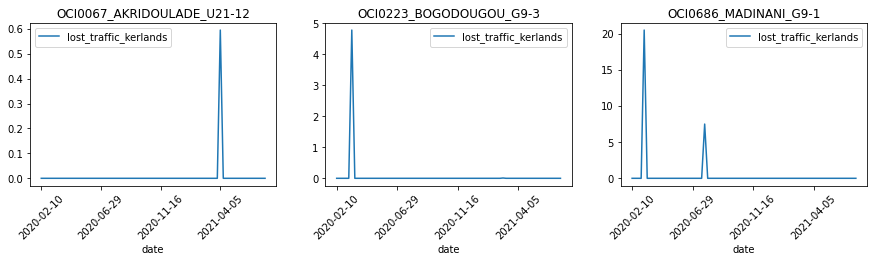

In [6]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI0067_AKRIDOULADE_U21-12', 'OCI0223_BOGODOUGOU_G9-3', 'OCI0686_MADINANI_G9-1']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','lost_traffic_kerlands']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : traffic_loss_rate

In [7]:
stds = 8
serie = data.groupby(['cell_name']).traffic_loss_rate.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0022_ADAOU_U9-1
OCI0022_ADAOU_U9-2
OCI0022_ADAOU_U9-3
OCI0268_BUYO_G18-1
OCI0317_COSROU_U9-1
OCI0317_COSROU_U9-2
OCI0317_COSROU_U9-3
OCI0387_DOBA_G18-1
OCI0387_DOBA_G18-2
OCI0432_FLATCHEDOUGOU_U21-11
OCI0432_FLATCHEDOUGOU_U21-12
OCI0432_FLATCHEDOUGOU_U21-13
OCI0432_FLATCHEDOUGOU_U21-21
OCI0432_FLATCHEDOUGOU_U21-22
OCI0432_FLATCHEDOUGOU_U21-23
OCI0432_FLATCHEDOUGOU_U21-31
OCI0432_FLATCHEDOUGOU_U21-32
OCI0432_FLATCHEDOUGOU_U21-33
OCI0488_GOHOUNFLA_G18-2
OCI0718_MBONOUA_U9-1
OCI0718_MBONOUA_U9-2
OCI0718_MBONOUA_U9-3
OCI0753_MIRA_G18-3
OCI0837_OGOUDOU_G18-1
OCI0837_OGOUDOU_G18-3
OCI1109_TOUPAH_U9-1
OCI1109_TOUPAH_U9-2
OCI1109_TOUPAH_U9-3
OCI1163_ZANZAN_U9-1
OCI1163_ZANZAN_U9-2
OCI1163_ZANZAN_U9-3
OCI1487_MONT_COUPE_U21-11
OCI1487_MONT_COUPE_U21-12
OCI1487_MONT_COUPE_U21-13
OCI1487_MONT_COUPE_U21-21
OCI1487_MONT_COUPE_U21-22
OCI1487_MONT_COUPE_U21-23
OCI1487_MONT_COUPE_U21-31
OCI1487_MONT_COUPE_U21-32
OCI1487_MONT_COUPE_U21-33
OCI1516_ETUEBOUE_U9-1
OCI1516_ETUEBOUE_U9-2
OCI1516_ETUEBOUE_

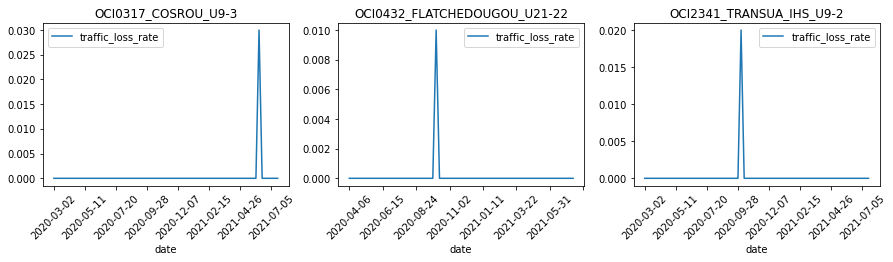

In [8]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI0317_COSROU_U9-3', 'OCI0432_FLATCHEDOUGOU_U21-22', 'OCI2341_TRANSUA_IHS_U9-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','traffic_loss_rate']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

## Outliered cells : average_number_of_users_in_queue

In [9]:
stds = 8
serie = data.groupby(['cell_name']).average_number_of_users_in_queue.apply(list)
corrupted_cells = []
for cell,values in serie.items():
    if len([x for x in values if x==x]) > 2:
        vmax = max(values)
        try : 
            vmin = min([x for x in values if x!=0 and x == x])
        except ValueError:
            vmin = vmax 
        vmean = mean(values)
        vstd  = stdev(values)
        if vmax > vmean +stds*vstd or vmin < vmean -stds*vstd:
            corrupted_cells += [cell]
            print(cell)

OCI0125_ATTIA_U9-3
OCI0189_BETTIE_U9-1
OCI0417_FACOBLY_U9-2
OCI0467_GD_BEREBY_U9-2
OCI0491_GOMON_U9-2
OCI0553_IROBO_U9-3
OCI0626_KOUETINFLA_U9-2
OCI1058_TANDA_U9-2
OCI1104_TOUKOUZOU_U9-3


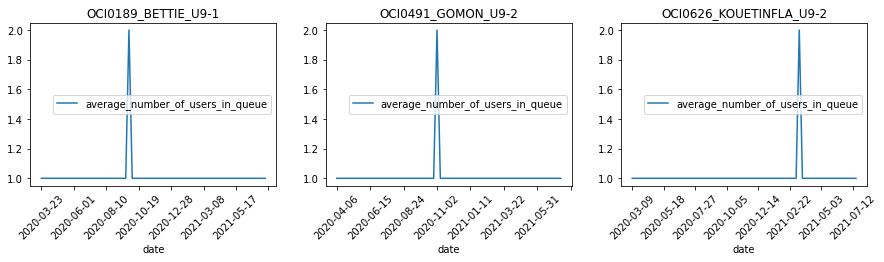

In [11]:
fig, axs = plt.subplots(1,3,figsize=(15,3))
outliers_samples = ['OCI0189_BETTIE_U9-1', 'OCI0491_GOMON_U9-2', 'OCI0626_KOUETINFLA_U9-2']
for i, cell in enumerate(outliers_samples):
    ax = axs[i]
    ax.set_title(cell)
    data[data['cell_name'] == cell][['date','average_number_of_users_in_queue']]\
    .plot(x='date',ax=ax)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)